In [8]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sbn 
import datetime as dtime

In [9]:
data = pd.read_csv(r"C:\Users\dwigh\Downloads\2013_Green_Taxi_Trip_Data_20241028.csv")
data.head()

,vendor_id,pickup_datetime,dropoff_datetime,Store_and_fwd_flag,rate_code,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,Total_amount,Payment_type,Trip_type,Pickup_longitude,Pickup_latitude,Dropoff_longitude
0,2,09/23/2013 10:52:00 AM,09/23/2013 10:52:00 AM,N,1,0.0,1,0.0,1.8,0.0,0.0,0.25,0.0,NaN,2.05,1,NaN,0.000000,0.00000,0.0
1,1,11/09/2013 12:55:29 AM,11/09/2013 12:55:29 AM,N,1,0.0,1,0.0,0.0,0.0,0.0,0.00,0.0,NaN,0.00,2,NaN,-73.929573,40.75436,0.0
2,2,09/17/2013 09:45:09 PM,09/17/2013 09:52:20 PM,N,4,0.0,1,0.0,8.5,0.0,0.5,0.00,0.0,NaN,9.00,2,NaN,0.000000,0.00000,0.0
3,2,10/02/2013 11:17:00 PM,10/02/2013 11:22:54 PM,N,1,0.0,1,0.0,2.8,0.0,0.5,0.00,0.0,NaN,3.30,2,1.0,0.000000,0.00000,0.0
4,2,10/02/2013 11:17:00 PM,10/02/2013 11:22:54 PM,N,1,0.0,1,0.0,2.8,0.0,0.5,0.00,0.0,NaN,3.30,2,1.0,0.000000,0.00000,0.0


In [10]:
data.pickup_datetime = pd.to_datetime(data.pickup_datetime)
data.dropoff_datetime = pd.to_datetime(data.dropoff_datetime)
data.head()


,vendor_id,pickup_datetime,dropoff_datetime,Store_and_fwd_flag,rate_code,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,Total_amount,Payment_type,Trip_type,Pickup_longitude,Pickup_latitude,Dropoff_longitude
0,2,2013-09-23 10:52:00,2013-09-23 10:52:00,N,1,0.0,1,0.0,1.8,0.0,0.0,0.25,0.0,NaN,2.05,1,NaN,0.000000,0.00000,0.0
1,1,2013-11-09 00:55:29,2013-11-09 00:55:29,N,1,0.0,1,0.0,0.0,0.0,0.0,0.00,0.0,NaN,0.00,2,NaN,-73.929573,40.75436,0.0
2,2,2013-09-17 21:45:09,2013-09-17 21:52:20,N,4,0.0,1,0.0,8.5,0.0,0.5,0.00,0.0,NaN,9.00,2,NaN,0.000000,0.00000,0.0
3,2,2013-10-02 23:17:00,2013-10-02 23:22:54,N,1,0.0,1,0.0,2.8,0.0,0.5,0.00,0.0,NaN,3.30,2,1.0,0.000000,0.00000,0.0
4,2,2013-10-02 23:17:00,2013-10-02 23:22:54,N,1,0.0,1,0.0,2.8,0.0,0.5,0.00,0.0,NaN,3.30,2,1.0,0.000000,0.00000,0.0


In [11]:
data.drop(columns=['Ehail_fee'], inplace=True)

In [27]:
data['day_of_week'] = data['pickup_datetime'].dt.day_name()
data['month'] = data.pickup_datetime.dt.month_name()
data['hour'] = data.pickup_datetime.dt.hour

<Figure size 1000x1000 with 0 Axes>

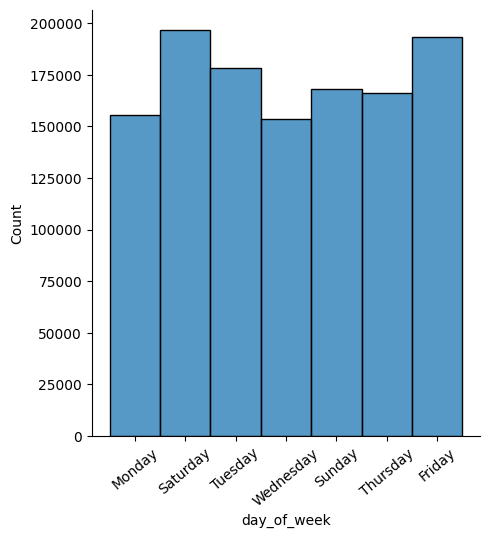

In [28]:
fig= plt.figure(figsize=(10,10))
sbn.displot(data=data,x=data.day_of_week, kind='hist')
plt.xticks(rotation=40)
plt.show()

<Figure size 1000x1000 with 0 Axes>

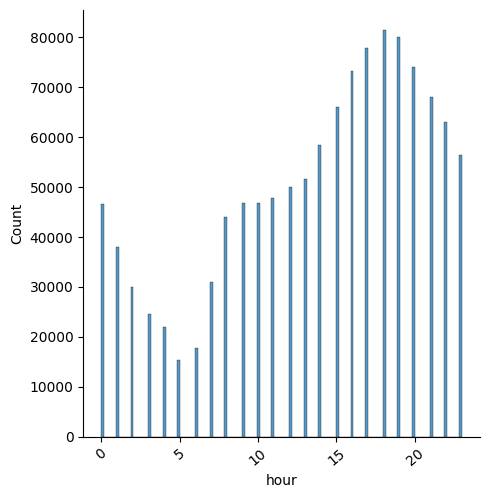

In [29]:
fig= plt.figure(figsize=(10,10))
sbn.displot(data=data,x=data.hour, kind='hist')
plt.xticks(rotation=40)
plt.show()

In [44]:
mon_dow_hr = data.groupby(['vendor_id','month','day_of_week','hour'])[['Total_amount']].sum()

In [51]:
mon_dow = data.groupby(['vendor_id','month','day_of_week'])[['Total_amount']].sum()

<Axes: title={'center': 'Total USD per Day'}, xlabel='day_of_week'>

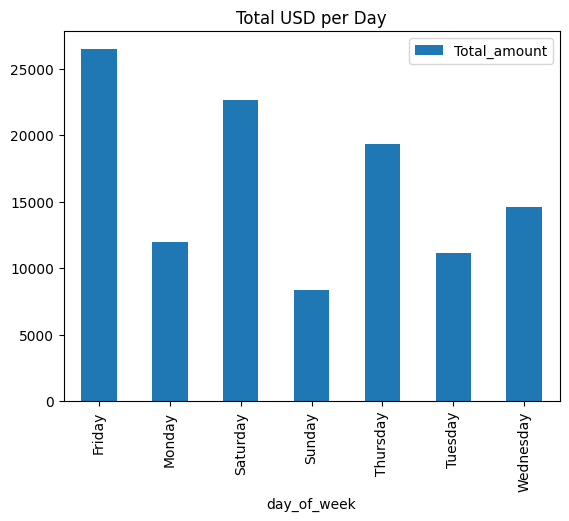

In [56]:
mon_dow.loc[(2,'August')].plot(title='Total USD per Day',kind='bar')

Text(0.5, 1.0, 'Total USD by Month & Hour of Day')

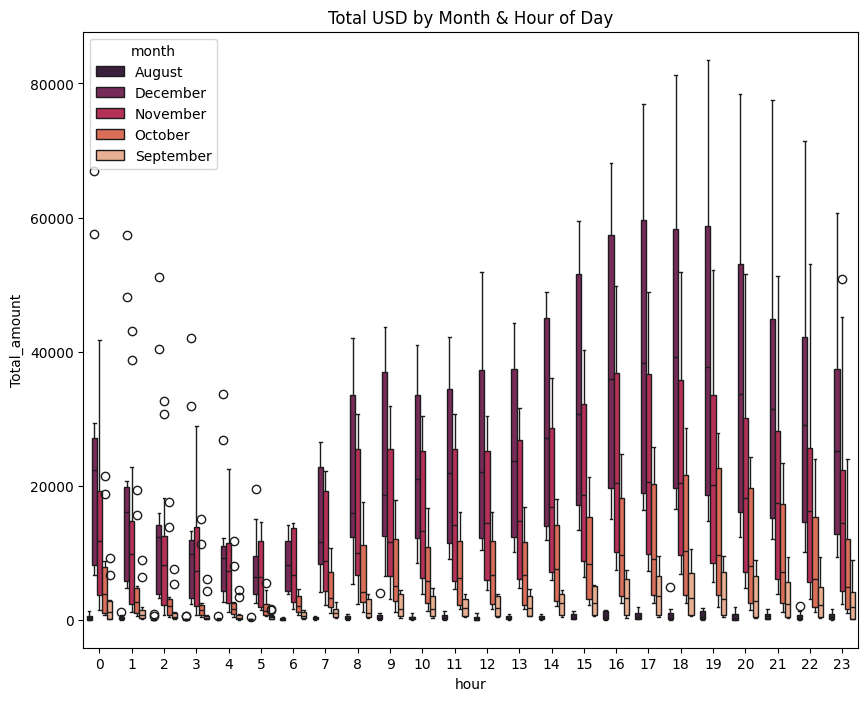

In [64]:
fig, ax = plt.subplots(figsize=(10,8))
sbn.boxplot(data=mon_dow_hr, x='hour', y='Total_amount',hue='month', palette='rocket')
ax.set_title('Total USD by Month & Hour of Day')

Text(0.5, 1.0, 'Total USD by Day & Month of Day')

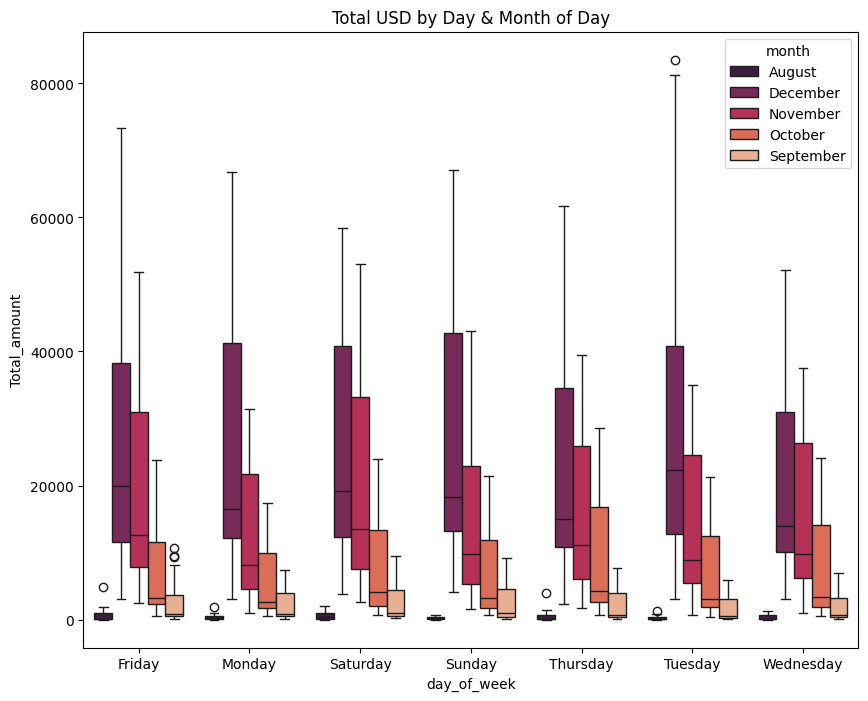

In [66]:
fig, ax = plt.subplots(figsize=(10,8))
sbn.boxplot(data=mon_dow_hr, x='day_of_week', y='Total_amount',hue='month', palette='rocket')
ax.set_title('Total USD by Day & Month of Day')

<Axes: title={'center': 'Total USD per Hour'}, xlabel='hour'>

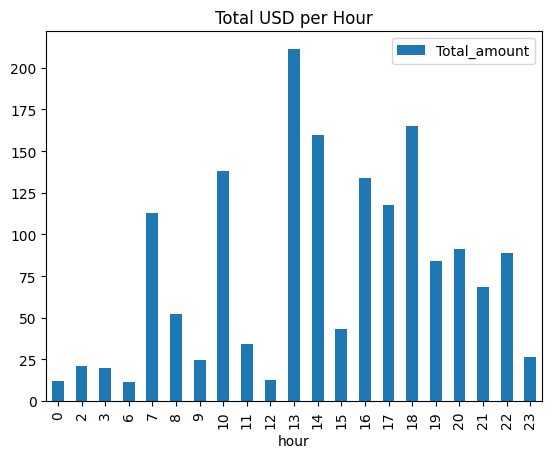

In [50]:
mon_dow_hr.loc[(1,'August', 'Friday')].plot(title='Total USD per Hour',kind='bar')

In [25]:
portions['January']

KeyError: 'January'

In [ ]:
fig= plt.figure(figsize=(10,10))
sbn.displot(data=data,x=data.hour, , kind='hist')
plt.xticks(rotation=40)
plt.show()